<a href="https://colab.research.google.com/github/dannyjammooa/Experimental-Machine-Learning-Projects/blob/master/BayesianPaperRedone/Bayesian_Analysis_of_the_Imqmd_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Bayesian Analysis of Imqmd Model**

### **Introduction**
$\; \; \; \; \; \;$This jupyter notebook containes my analysis of the Imqmd Model with the experimental data using Bayesian analysis.
To do the anylysis certine mathematical tools where used. The mathematical tools that we will be using in this notebook are Preprocessing, Principal Component Analysis(PCA), Gaussian Process, and Markov Chain Monte Carlo (MCMC).

### **Librarys**
$\; \; \; \; \; \;$ First I will speak about the librarys that were used for this analysis. For this notebook the use of five librarys was crucial, the rest was just to make things prettier for example tqdm.auto to get a loading bar and seaborn for nicer plots.

- NumPy
- Pandas
- Matplotlib/Seaborn
- Scipy.stats
- Scikit Learn

The use of the library NumPy is a given for its use in numerical computation and the use of mathematical funtions. Pandas is used for data manipulation and structuring the data using DataFrames. Matplotlib/Seaborn are used to make graphs of the analysis. Scipy.stats is used for its statistical distributions and PDF of a truncated normal. Scikit learn library will be used to apply Preprocessing to the data, PCA, and Gaussian Processs.


In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
from sklearn.decomposition import PCA
from numpy import linalg as la
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, ConstantKernel as C, WhiteKernel
from scipy.stats import norm, uniform, multivariate_normal, truncnorm
from tqdm.auto import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### **Reading and Scaling Data**
$\; \; \; \; \; \;$ In the next portion of the notebook, experimental and Imqmd data will be imported and structured using Pandas. Also, the use of scikit learn library for preprocessing will be applied to scale the output data from the Imqmd model. Scaling the data is importent for when PCA and Guassian Process is applied. This process will remove any outliers in the data that might result in big eigenvalues to apear which can affect the use of PCA and thus inturn the Gaussian Process and further analysis.


In [ ]:
#This will create a drop down menue for which one can select the files from their computer
from google.colab import files
uploaded = files.upload()
print("-------------------------------------------------------------------------------")
uploadeds = files.upload()

Saving e120_bugfix_model_new_mv.csv to e120_bugfix_model_new_mv.csv
-------------------------------------------------------------------------------


Saving e120_exp_result.csv to e120_exp_result.csv


In [ ]:
import io
features = ['SN112EK42.5', 'SN112EK47.5', 'SN112EK52.5', 'SN112EK57.5', 'SN112EK62.5', 'SN112EK67.5', 'SN112EK72.5', 'SN112EK77.5', 'SN112EK82.5', 'SN112EK87.5', 'SN124EK42.5', 'SN124EK47.5', 'SN124EK52.5', 'SN124EK57.5', 'SN124EK62.5', 'SN124EK67.5', 'SN124EK72.5', 'SN124EK77.5', 'SN124EK82.5', 'SN124EK87.5', 'DREK12.5', 'DREK17.5', 'DREK22.5', 'DREK27.5', 'DREK32.5', 'DREK37.5', 'DREK42.5', 'DREK47.5', 'DREK52.5', 'DREK60.0', 'DREK70.0', 'DREK80.0', 'DREK87.5']
inputs = ['S0', 'L', 'ms', 'mv']
error_features = ['SN112EK42.5_Error', 'SN112EK47.5_Error', 'SN112EK52.5_Error', 'SN112EK57.5_Error', 'SN112EK62.5_Error', 'SN112EK67.5_Error', 'SN112EK72.5_Error', 'SN112EK77.5_Error', 'SN112EK82.5_Error', 'SN112EK87.5_Error', 'SN124EK42.5_Error', 'SN124EK47.5_Error', 'SN124EK52.5_Error', 'SN124EK57.5_Error', 'SN124EK62.5_Error', 'SN124EK67.5_Error', 'SN124EK72.5_Error', 'SN124EK77.5_Error', 'SN124EK82.5_Error', 'SN124EK87.5_Error', 'DREK12.5_Error', 'DREK17.5_Error', 'DREK22.5_Error', 'DREK27.5_Error', 'DREK32.5_Error', 'DREK37.5_Error', 'DREK42.5_Error', 'DREK47.5_Error', 'DREK52.5_Error', 'DREK60.0_Error', 'DREK70.0_Error', 'DREK80.0_Error', 'DREK87.5_Error']
df  = pd.read_csv(io.BytesIO(uploaded['e120_bugfix_model_new_mv.csv']), usecols=features)
df2  = pd.read_csv(io.BytesIO(uploaded['e120_bugfix_model_new_mv.csv']), usecols=inputs)
df3 = pd.read_csv(io.BytesIO(uploadeds['e120_exp_result.csv']), usecols=features)
df4 = pd.read_csv(io.BytesIO(uploadeds['e120_exp_result.csv']), usecols=error_features)

In [ ]:
#importing and reshaping experimental data
y_ex_std =df4.loc[:,error_features].values
Y_ex = df3.loc[:, features].values
Y_ex = Y_ex.reshape(1,33)
Y_mu =Y_ex.reshape(33) #used for the likelihood function
y_ex_std = y_ex_std.reshape(33,1)
 
#importing inputs from imqmd spreadsheet
x = df2.loc[:, inputs].values
xdf = pd.DataFrame(data = x, columns = ['S0', 'L', 'ms', 'mv'])
 
#importing and scaling output from imqmd spreadsheet
y = df.loc[:, features].values
scaler = StandardScaler(with_std=True, with_mean=False)
CJ = pd.DataFrame(data = y, columns = features)
CJ.head()

,SN112EK42.5,SN112EK47.5,SN112EK52.5,SN112EK57.5,SN112EK62.5,SN112EK67.5,SN112EK72.5,SN112EK77.5,SN112EK82.5,SN112EK87.5,SN124EK42.5,SN124EK47.5,SN124EK52.5,SN124EK57.5,SN124EK62.5,SN124EK67.5,SN124EK72.5,SN124EK77.5,SN124EK82.5,SN124EK87.5,DREK12.5,DREK17.5,DREK22.5,DREK27.5,DREK32.5,DREK37.5,DREK42.5,DREK47.5,DREK52.5,DREK60.0,DREK70.0,DREK80.0,DREK87.5
0,1.049740,1.009370,0.971587,0.933543,0.895236,0.860123,0.828202,0.797841,0.769038,0.742806,1.40493,1.37751,1.35058,1.32147,1.29021,1.25781,1.22430,1.19163,1.15983,1.12686,1.19434,1.21192,1.23344,1.25778,1.28492,1.31206,1.33919,1.36544,1.39081,1.42918,1.47076,1.50127,1.51709
1,1.101460,1.076550,1.053560,1.032650,1.013830,0.995491,0.977648,0.959740,0.941767,0.928342,1.46000,1.46512,1.47600,1.48391,1.48885,1.49423,1.50005,1.51005,1.52425,1.53633,1.17779,1.19134,1.20964,1.23401,1.26444,1.29513,1.32608,1.36158,1.40161,1.45320,1.51812,1.59659,1.65511
2,1.033870,0.999617,0.967117,0.937034,0.909368,0.884840,0.863449,0.842654,0.822455,0.805631,1.37691,1.36034,1.34682,1.33146,1.31428,1.29950,1.28711,1.27224,1.25487,1.24206,1.18462,1.20281,1.22636,1.25178,1.27908,1.30598,1.33249,1.36163,1.39341,1.43365,1.48005,1.51807,1.54192
3,0.979704,0.948603,0.921646,0.900123,0.884032,0.867298,0.849921,0.837539,0.830154,0.821927,1.29187,1.27633,1.26373,1.25524,1.25084,1.24622,1.24137,1.23869,1.23817,1.23582,1.17578,1.19279,1.21577,1.23993,1.26528,1.29176,1.31937,1.34603,1.37173,1.40500,1.44910,1.48531,1.50366
4,1.026250,0.998031,0.974097,0.951106,0.929057,0.908939,0.890750,0.876159,0.865163,0.855486,1.32474,1.31925,1.31962,1.32045,1.32175,1.32643,1.33447,1.34221,1.34966,1.36205,1.17050,1.17938,1.19465,1.21375,1.23669,1.26262,1.29155,1.32245,1.35531,1.40611,1.47931,1.54623,1.59240


### **PCA and Gaussian Process**
$\; \; \; \; \; \;$ In the next portion of the notebook, the use of PCA and Gaussian Process will be applied. The application of these mathematical tool will be used on the output data form the Imqmd model, for most of the analysis we will be dealing with such data.

#### **Principal Component Analysis**
$\; \; \; \; \; \;$ If we take a look at the output data from the Imqmd model, we sea that it contains 33 features (or dimensions) with each feature having 47 samples. To processed and use the Gaussian Process, one must reduce the size of the output features, for the Gaussian Process would not be able to create an accurte model with such a large dimension size. This is where PCA comes into play, reducing the dimensional space using a best fit.

$\; \; \; \; \; \;$ Scikit Learn library for decomposition will be used to preform the PCA calculations. All that is needed for the Scikit Learn PCA package is the data set formated in a design matrix and specifiying the required dimensions for the data set wished to be reduced to. The data set obtained from the PCA calculations will also be scaled to remove any outliers that might affect the predictive model generated by the Gaussian Process.

#### **Gaussian Process**

$\; \; \; \; \; \;$ Once we have reduced the dimensionality of our data set we can create a predictive model that best represent our data. For the predicitive model, we will use Gaussian Process.

$\; \; \; \; \; \;$ Scikit Learn library will be used to preform the Gaussian Process calculations and create our predictive model. The Scikit Learn Guassian Process asks for to specifiy the shape of the kernel one whishs to model the data after, and both the input and output data. Then once the gaussian process makes the fit of the model, one can asks for optemization of the kernel hyperperamaters for each data set or problem will have its own distinguished hyperperamaters. Which then one can go back and specifiy inthe kernel, allowing the Gaussian Process to create a better fit for our predictive model. Scikit learn uses the Log-Marginal likelihood to preform the optomization. This is great for this problem, for we are using a bayesian method to optomize the model which will then be used for our bayesian analysis. For this problem we will be using a kernal with the shape of a squared exponential (RBF in this case) plus some noise.



In [ ]:
#applying PCA on the scaled outputs and reducing it from 33D to 3D
pca = PCA(n_components=2)
yP = pca.fit_transform(y)
#Once again the data is scaled before going into the Gaussian process
scaler_pca =  StandardScaler(with_std=True, with_mean=False)
scaler_pca = scaler_pca.fit(yP)
yPCA = scaler_pca.transform(yP)
PCADf = pd.DataFrame(data = yPCA, columns = ['PCA 1', 'PCA 2'])

print("Explained variance ratio for each PCA component:",pca.explained_variance_ratio_)
print("-------------------------------------------------------------------------------")
print("Sum of Explained variance ratio:",sum(pca.explained_variance_ratio_))
print("-------------------------------------------------------------------------------")

PCADf.head()

Explained variance ratio for each PCA component: [0.95664316 0.03929512]
-------------------------------------------------------------------------------
Sum of Explained variance ratio: 0.9959382736763225
-------------------------------------------------------------------------------


,PCA 1,PCA 2
0,0.008352,1.706120
1,-1.620604,0.215457
2,-0.317150,0.550783
3,-0.020555,-0.870343
4,-0.582944,-1.002736


In [ ]:
#using scikit-learn gaussian process
#The gaussian process is split in two different models, because sickit learn doesn't have the capability of creating a covariance matrix if we create one model of the whole data set.
k1 = C(constant_value=24.489343337419225)*RBF(length_scale =[56.00281969, 196.622317  ,   1.29676659,   0.89589563]) + WhiteKernel(noise_level=0.00205604339510395)
k2 = C(constant_value=29.398350560889348)*RBF(length_scale =[30.43228749, 201.8923016 ,   0.62653122,   0.35015286]) + WhiteKernel(noise_level=0.0029249145296267706)
gp1 = GaussianProcessRegressor(kernel=k1, n_restarts_optimizer=9, normalize_y=True, random_state=0)
gp1.fit(x, yPCA[:,0])
gp2 = GaussianProcessRegressor(kernel=k2, n_restarts_optimizer=9, normalize_y=True, random_state=0)
gp2.fit(x, yPCA[:,1])
print("R^2 of the first model:",gp1.score(x,yPCA[:,0]))
print("-------------------------------------------------------------------------------")
print("R^2 of the second model:", gp2.score(x,yPCA[:,1]))
print("-------------------------------------------------------------------------------")
#here we ask for the otemization of the hyperperameters to then re-input in the model and run again.
print("Kernel 1 optimization:", gp1.kernel_.get_params())
print("-------------------------------------------------------------------------------")
print("Kernel 2 optimization:", gp2.kernel_.get_params())

R^2 of the first model: 0.998721652372844
-------------------------------------------------------------------------------
R^2 of the second model: 0.9988608980015778
-------------------------------------------------------------------------------
Kernel 1 optimization: {'k1': 4.95**2 * RBF(length_scale=[56, 197, 1.3, 0.896]), 'k2': WhiteKernel(noise_level=0.00206), 'k1__k1': 4.95**2, 'k1__k2': RBF(length_scale=[56, 197, 1.3, 0.896]), 'k1__k1__constant_value': 24.489533498572357, 'k1__k1__constant_value_bounds': (1e-05, 100000.0), 'k1__k2__length_scale': array([ 56.00308742, 196.62201426,   1.29676795,   0.89589889]), 'k1__k2__length_scale_bounds': (1e-05, 100000.0), 'k2__noise_level': 0.00205604339510395, 'k2__noise_level_bounds': (1e-05, 100000.0)}
-------------------------------------------------------------------------------
Kernel 2 optimization: {'k1': 5.42**2 * RBF(length_scale=[30.4, 202, 0.627, 0.35]), 'k2': WhiteKernel(noise_level=0.00292), 'k1__k1': 5.42**2, 'k1__k2': RBF(leng

In [ ]:
#predicts new outputs using GP and reverse PCA, while also reversing the scaling
def gaussian_PCA(S0, L, ms, mv, Samples):
    #this part is used for the prior for we have a lot of samples for the inputs
    if Samples > 1:
        S0 = S0.reshape(Samples,1)
        mv = mv.reshape(Samples,1)
        ms = ms.reshape(Samples,1)
        L = L.reshape(Samples,1)
        xx_ = np.concatenate((S0,L),axis=1)
        xxx_ = np.concatenate((ms,mv),axis=1)
        X_ = np.concatenate((xx_,xxx_),axis=1) 
        y1_pred, y1_std = gp1.predict(X_, return_std=True)
        y2_pred, y2_std = gp2.predict(X_, return_std=True)
        y1_pred = y1_pred.reshape(Samples,1)
        y2_pred = y2_pred.reshape(Samples,1)
        y_predz = np.concatenate((y1_pred,y2_pred),axis=1)
        y_preds = scaler_pca.inverse_transform(y_predz)
        return np.dot(y_preds, pca.components_) + pca.mean_
    #This part is used for the MCMC for the MCMC only spits out 1 sample of the input at a time    
    else:    
        x_ = np.matrix([S0,L,ms,mv]) 
        y1_pred, y1_std = gp1.predict(x_, return_std=True)
        y2_pred, y2_std = gp2.predict(x_, return_std=True)
        y1_pred = y1_pred.reshape(Samples,1)
        y2_pred = y2_pred.reshape(Samples,1)
        y1_std = y1_std.reshape(Samples,1)
        y2_std = y2_std.reshape(Samples,1)
        y_predz = np.concatenate((y1_pred,y2_pred),axis=1)
        y_stdz = np.concatenate((y1_std,y2_std),axis=1)
        y_preds = scaler_pca.inverse_transform(y_predz)
        y_stdk = scaler_pca.inverse_transform(y_stdz)
        y_stds = (y_stdk**2)*np.eye(2)
        return np.dot(y_preds, pca.components_) + pca.mean_, np.dot(np.dot(pca.components_.T,y_stds),pca.components_)

### **Bayesian Analysis**

$\; \; \; \; \; \;$Bayesian inference is the process of fitting a probability model to a set of data and summarizing the result by a probability distribution on the parameters of the model and on unobserved quantities such as predictions for new observations.

#### **Bayes Theorem**

Fundamental rules of statistics
- Probability of union of two events X & Y

$$P(X \cup Y) = P(X) + P(Y) - P(X \cap Y)$$

<center>for mutually exclusive case</center>

$$P(X \cup Y) = P(X) +P(Y)$$

- Joint Probability
    - given a P(X,Y), using the product rule we get
    
$$P(X,Y) = P(X|Y)P(Y)$$

- Marginal Probability
$$P(X) = \Sigma_{i}(P(X|Y=i)P(Y=i)$$

- Conditional Probability
$$P(X|Y) = \frac{P(X,Y)}{P(Y)}$$

Using the information above we can formulate
Bayes Theorem:
$$P(X|Y) = \frac{P(Y|X)P(X)}{P(Y)}$$

P(Y|X) is the likelihood function and modifies the prior through experimental measurements.

P(X) is the prior distribution, and it represents our state of knowledge about the truth of the hypthiesis (x) before we have analyesed the current data

P(Y) is the evidence, which is a normalization constant.

P(X|Y) is the posterior distribution, it represents our state of knowledge about the truth of the hypothisis in the light of the data

However, for the problem at hand it will be dificult to find the evidence, and thus we will not be using it. So, our prosterior we will be using is as follows. 

$$P(X|Y) \propto P(Y|X)P(X)$$

#### **Applying Bayes Theorem to our problem**

First we will need to choose/find the priors and likelihood function for the problem.

##### **Prior**

In this case we have three priors with a uniform distribution and one with a truncated gaussian.

P(S0) $\in$ U[25.7,36] $= \frac{1}{B-A} = \frac{1}{10.3}$

P(L) $\in$ U[32,120] $= \frac{1}{B-A} = \frac{1}{88}$

P(ms) $\in$ N[0.6,1.0] $\neq \frac{1}{\sqrt{2\pi}\sigma}exp(-\sum \frac{(y_{pred} - y_{exp})^2}{2\sigma^2})$, for P(ms) is a truncated normal, so we will use Scipy.Stats truncated normal pdf function to calculate it.

P(mv) $\in$ U[0.6,1.2] $= \frac{1}{B-A} = \frac{1}{0.6}$

##### **Likelihood**

The likelihood in for this problem is a multivariate gaussian.

$$Like = \frac{1}{\sqrt{2\pi}\sigma}exp(-\sum \frac{(y_{pred} - y_{exp})^2}{2\sigma^2})$$

$$like = \frac{1}{\sqrt{2\pi\left|\Sigma\right|}}e^{(-(y_{pred}-y_{exp})\Sigma^{-1}(y_{pred}-y_{exp}).T)}$$

$$\Sigma = Ycov_{pred} + Y_{experror}I$$

##### **Posterior**

Putting everythine togather using Bayes Theorm, we get our posterior distribution.

$$P(S0,L,ms,mv|Y) \propto P(Like)(S0)P(L)P(ms)P(mv)$$



In [ ]:
#finds the PDF of value which has a truncated normal distribution
def trunc_norm_pdf(ms_c):
    return truncnorm.pdf(ms_c, (0.6-0.7)/0.05, (1.0-0.7)/0.05, 0.7, 0.05)

#Generates a value using a truncated normal distribution
def truncated_normal(mean=0.7, sd=0.05, low=0.6, upp=1):
    return truncnorm((low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

#creates the likelihood function
def likelihoodFunc(Y, mean, cov):
    return multivariate_normal.pdf(Y, mean, cov)

#created the likelihood function
def PosteriorFunc(S0,L,ms,mv):
    r = gaussian_PCA(S0,L,ms,mv,Samples=1)
    Y = r[0]
    covM = r[1]
    COVMM = covM + (y_ex_std**2)*np.eye(33)
    like = likelihoodFunc(Y,Y_mu,COVMM)
    ms_prior = trunc_norm_pdf(ms) 
    return like*(1/10.3)*(1/88)*(ms_prior)*(1/0.6), mean_squared_error(Y_ex,Y)


### **Markov Chain Monte Carlo**

$\; \; \; \; \; \;$Markov chain Monte Carlo methods create samples from a continuous random variable, with probability density proportional to a known function. These samples can be used to evaluate an integral over that variable. Starting from a set of points arbitrarily chosen and sufficiently distant from each other. These chains are stochastic processes of "walkers" which move around randomly according to an algorithm that looks for places with a reasonably high contribution to the integral to move into next, assigning them higher probabilities.

#### **Metropolis-Hastings Algorithm**

$\; \; \; \; \; \;$The algorith that will be used to look for places with a reasonably high contribution to the integral to move into next in this notebook is the Metropilis-Hastings Alogrithm.

Say we are sampling f(x)

1. we choose an arbitrary point $x_{t}$ to be the first sample
2. we generate a candidate x' based on the previous sample by moving to the right or left. (x -> x')
3. we create the acceptance ratio $\alpha = \frac{f(x')}{f(x)}$.
    
    Accept or reject:
    - Generate a uniform random number u  $\in$   [0,1]

    - if $u \leq min(1,\alpha)$, then accept the candidate by setting $x_{t+1} = x'$

    - if $u>  min(1,\alpha)$, then reject the candidate and set $x_{t+1} = x_{t}$

In [ ]:
#This Method of MCMC records only the position of accepted move
def MCMC(PosteriorFunc, Iterations, step1, step2, step3, step4):
    ms_a = []
    mv_a = []
    L_a = []
    S0_a = []
    a_a = [] #recording acceptance
    p_a = [] #recording posterior
    MSE_a = [] #recording mean square error
    a_c = 0
    ms_c = 0.7
    mv_c = 0.7
    L_c = 60
    S0_c = 26
    post_c = PosteriorFunc(S0_c,L_c,ms_c,mv_c) 
    posterior_c = post_c[0] #posterior function of initial conditions
    MSE_c = post_c[1] #MSE of initial conditions
    for event in tqdm(range(Iterations-1)):
        ms_p = ms_c + np.random.uniform(-step3,step3)
        mv_p = mv_c + np.random.uniform(-step4,step4)
        L_p = L_c + np.random.uniform(-step2,step2)
        S0_p = S0_c + np.random.uniform(-step1,step1)
        #The random walk is restricted by the parameters in the paper
        parameters = [0.6<=ms_p<=1.0,0.6<=mv_p<=1.2,25.7<=S0_p<=36,32<=L_p<=120] 
        if all(parameters): 
            post_p = PosteriorFunc(S0_p,L_p,ms_p,mv_p)
            posterior_p = post_p[0]
            MSE_p = post_p[1]
            met_r = posterior_p/posterior_c
            accept = np.random.rand() < min(1,met_r)
            if accept:
                ms_c = ms_p
                mv_c = mv_p
                S0_c = S0_p
                L_c = L_p
                posterior_c = posterior_p
                a_c = a_c + 1
                MSE_c = MSE_p
                p_a.append(posterior_c)
                a_a.append(a_c)
                ms_a.append(ms_c)
                mv_a.append(mv_c)
                L_a.append(L_c)
                S0_a.append(S0_c)
                MSE_a.append(MSE_c)
    return np.array(ms_a), np.array(mv_a),np.array(L_a),np.array(S0_a), np.array(a_a), np.array(p_a), np.array(MSE_a)

#This MCMC method also records the position where the variable stays after a move was rejected
def MCMC2(PosteriorFunc, Iterations, step1, step2, step3, step4):
    ms_a = []
    mv_a = []
    L_a = []
    S0_a = []
    p_a = []
    a_a = []
    a_c = 0
    ms_c = 0.7
    mv_c = 0.7
    L_c = 60
    S0_c = 28
    posterior_c =PosteriorFunc(S0_c,L_c,ms_c,mv_c)
    for event in tqdm(range(Iterations-1)):
        ms_p = ms_c + np.random.uniform(-step3,step3)
        mv_p = mv_c + np.random.uniform(-step4,step4)
        L_p = L_c + np.random.uniform(-step2,step2)
        S0_p = S0_c + np.random.uniform(-step1,step1)
        parameters = [0.6<=mv_p<=1.2,25.7<=S0_p<=36,32<=L_p<=120]
        if all(parameters): 
            posterior_p = PosteriorFunc(S0_p,L_p,ms_p,mv_p)
            accept = np.random.rand() < posterior_p/posterior_c
            if accept:
                ms_c = ms_p
                mv_c = mv_p
                S0_c = S0_p
                L_c = L_p
                a_c = a_c + 1
                posterior_c = posterior_p
                ms_a.append(ms_c)
                mv_a.append(mv_c)
                L_a.append(L_c)
                S0_a.append(S0_c)
                a_a.append(a_c)
                p_a.append(posterior_c)
            else:
                ms_c = ms_c
                mv_c = mv_c
                S0_c = S0_c
                L_c = L_c
                posterior_c = posterior_c
                ms_a.append(ms_c)
                mv_a.append(mv_c)
                L_a.append(L_c)
                S0_a.append(S0_c)
                p_a.append(posterior_c)
        else:
            ms_c = ms_c
            mv_c = mv_c
            S0_c = S0_c
            L_c = L_c
            posterior_c = posterior_c
            ms_a.append(ms_c)
            mv_a.append(mv_c)
            L_a.append(L_c)
            S0_a.append(S0_c)
            p_a.append(posterior_c)
    return np.array(ms_a), np.array(mv_a),np.array(L_a),np.array(S0_a), np.array(a_a), np.array(p_a)


#gives the weighted average and std of the inputs S0,L,ms,mv after MCMC sampling using the posterior that was generated
def weighted_avg_and_std(values, weights):
    average = np.average(values, weights=weights)
    variance = np.average((values-average)**2, weights=weights)
    return (average, np.sqrt(variance))

### **Analysis**
  We will be using the sampled S0, L, ms, and mv for our analysis. The sampled variables are not the posterior distribution; however, they have been influnced by it and thus takes a similar shape to it. The posterior distribution will be used to attain the average and std of each sampled variable.


acceptace rate: 0.5304958


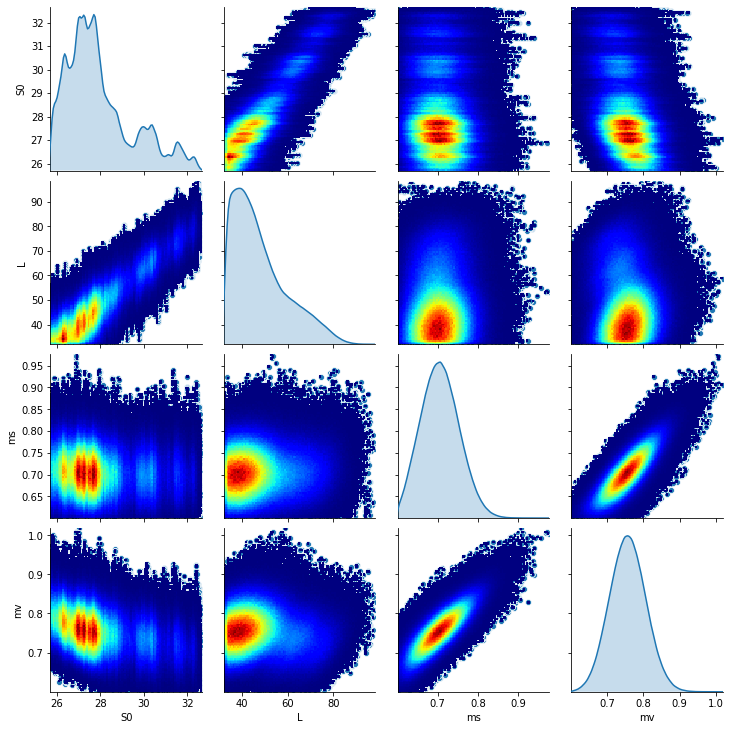

In [ ]:
#Runs the MCMC sampling
N= 5000000
Bayesian = MCMC(PosteriorFunc,Iterations=N ,step1=0.01, step2=2, step3=0.03, step4=0.03) #calling the MCMC methods
 
#Get the Sampled data from the MCMC
kms = Bayesian[0]
kmv = Bayesian[1]
kL = Bayesian[2]
kS0 = Bayesian[3]
ka = Bayesian[4]
kp = Bayesian[5]
kMSE = Bayesian[6]
 
#The acceptance rate of the metropolis algorithm
accept = kms.size
GG = ka.size/N
print("acceptace rate:", GG)
 
#reshaping the data for analysis
kS0 = kS0.reshape(accept,1)
kL = kL.reshape(accept,1)
kms = kms.reshape(accept,1)
kmv = kmv.reshape(accept,1)
kp = kp.reshape(accept,1)
SL = np.concatenate((kS0,kL),axis=1)
msv = np.concatenate((kms,kmv),axis=1)
x_mcmc = np.concatenate((SL,msv),axis=1)
x_MCMC = pd.DataFrame(data = x_mcmc, columns =  ['S0', 'L', 'ms', 'mv'])
 
#creates figure 2
T = sns.pairplot(x_MCMC, diag_kind="kde")
T.map_offdiag(plt.hist2d, bins=100, edgecolor=None, cmin=1,cmap=plt.cm.jet)


S0: mean: 28.079280533451374 std: 1.5412427639227562
-------------------------------------------------------------------------------
L: mean: 47.99179147688196 std: 11.853598569863694
-------------------------------------------------------------------------------
ms: mean: 0.7036301881683319 std: 0.03430894800746436
-------------------------------------------------------------------------------
mv: mean: 0.7496402691143228 std: 0.037676128883854264
-------------------------------------------------------------------------------


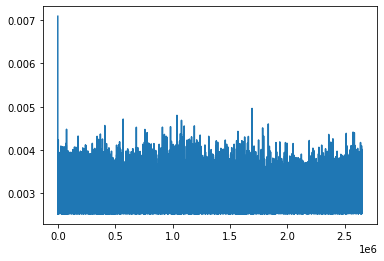

In [ ]:
#Find the weighted average and std of each input after mcmc sampling
mean_S0, std_S0 = weighted_avg_and_std(kS0, kp)
mean_L, std_L = weighted_avg_and_std(kL, kp)
mean_ms, std_ms = weighted_avg_and_std(kms, kp)
mean_mv, std_mv = weighted_avg_and_std(kmv, kp)
print("S0:", "mean:", mean_S0, "std:", std_S0)
print("-------------------------------------------------------------------------------")
print("L:", "mean:", mean_L, "std:", std_L)
print("-------------------------------------------------------------------------------")
print("ms:", "mean:", mean_ms, "std:", std_ms)
print("-------------------------------------------------------------------------------")
print("mv:", "mean:", mean_mv, "std:", std_mv)
print("-------------------------------------------------------------------------------")
plt.plot(kMSE)

(-0.4, 0.4)

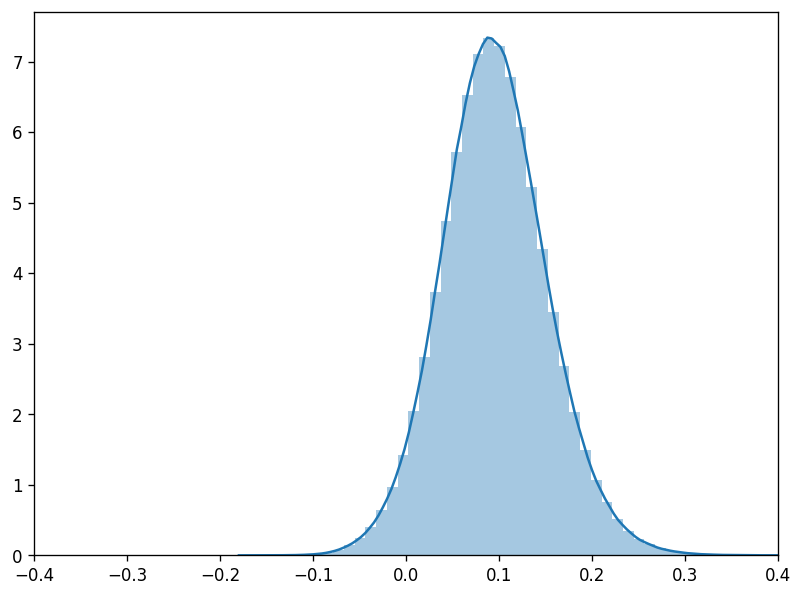

In [ ]:
#using the ms and mv sampling from mcmc, figure 3 can be created
fI = 1/kms - 1/kmv
figure(num=None,figsize=(8,6), dpi=120, facecolor='w', edgecolor='k')
sns.distplot(fI)
plt.xlim(-0.4,0.4)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.


(0.4, 1.8)

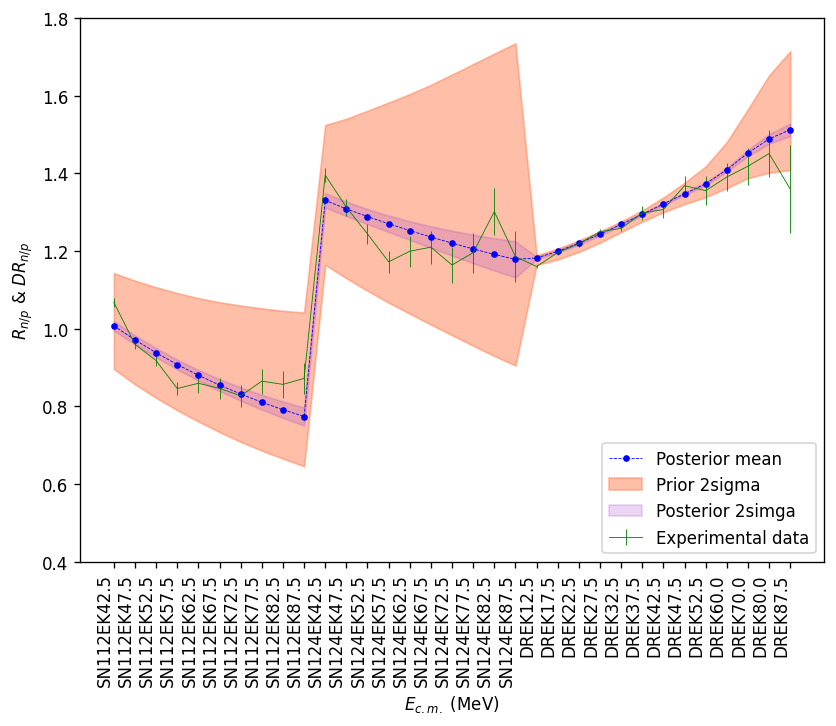

In [ ]:
#creating the 2sigma prior, and to do so we generate radom inputs using the parameters from the paper
Samples = 500 
mms = truncated_normal(mean =0.7, sd =0.05, low=0.6, upp=1) 
mms = mms.rvs(Samples)
mmv = np.random.uniform(0.6,1.2,Samples) 
sS0 = np.random.uniform(25.7,36,Samples)
lL = np.random.uniform(32,120,Samples) 

#putting the 2sigma prior in a dataframe 
y_prior = gaussian_PCA(sS0,lL,mms,mmv,Samples)
y_prior_preddf = pd.DataFrame(data = y_prior, columns =  features)
y_prior_preddf.head()
 
#finding the mean and std of each feature
y_prior_mean = y_prior_preddf[features].mean()
sig =  np.std(y_prior_preddf[features])
sig = 2*sig

"--------------------------------------------------------------------"
#Reshaping the Experimental Data for plotting purposes
y_ex_stds = y_ex_std.reshape(33,1)
Y_exs = Y_ex.reshape(33,1)
 
"---------------------------------------------------------------------"
#mcmc posterior mean
Y_mcmc = gaussian_PCA(kS0,kL,kms,kmv,accept)
Y_mcmcdf= pd.DataFrame(data = Y_mcmc, columns =  features)
Y_mcmcdf.head()

#finding the mean and std of each feature 
Y_mcmc_mean = Y_mcmcdf[features].mean()
sigma_mcmc =  np.std(Y_mcmcdf[features])
sigma_mcmc = 2*sigma_mcmc
 
#Creating a plot
figure(num=None,figsize=(8,6), dpi=120, facecolor='w', edgecolor='k')
Y_ex = Y_ex.reshape(33,1)
exp_data = plt.errorbar(features,Y_exs, yerr = y_ex_stds, fmt ='g',linewidth=0.5, label ='Experimental data')
two_sigma = plt.fill_between(features, y_prior_mean + sig,y_prior_mean -sig, alpha=0.5, color='coral', label='Prior 2sigma')
RRE = plt.plot(features, Y_mcmc_mean, 'b.--',linewidth=0.5, label ='Posterior mean')
UY = plt.fill_between(features, Y_mcmc_mean + sigma_mcmc,Y_mcmc_mean-sigma_mcmc, alpha=0.2, color='darkorchid', label='Posterior 2simga')
plt.xlabel('$E_{c.m.}$ (MeV)')
plt.xticks(rotation=90, ha='right')
plt.ylabel('$R_{n/p}$ & $DR_{n/p}$')
plt.legend(loc='lower right')
plt.ylim(0.4,1.8)

In [ ]:
#slicing the previous figure into three separate  graphs
coo =['mean']
coos = ['std']
pff = pd.DataFrame(data = y_prior_mean, columns=coo)
pffs = pd.DataFrame(data = sig, columns=coos)
HH = pff.loc[:,coo].values
HHs = pffs.loc[:,coos].values

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.


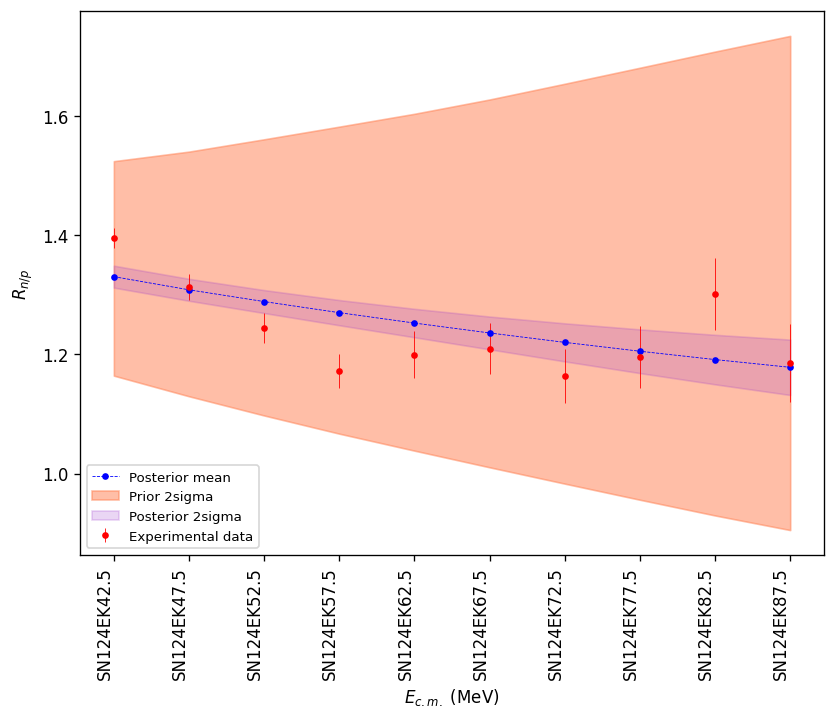

In [ ]:
#Middle Segment: single ratio of SN124
Z = HH[10:20]
Zs = HHs[10:20]
Z = Z.reshape(10)
Zs = Zs.reshape(10)
ZX = np.array(['SN124EK42.5', 'SN124EK47.5', 'SN124EK52.5', 'SN124EK57.5', 'SN124EK62.5', 'SN124EK67.5', 'SN124EK72.5', 'SN124EK77.5', 'SN124EK82.5', 'SN124EK87.5'])
SN124 = ['SN124EK42.5', 'SN124EK47.5', 'SN124EK52.5', 'SN124EK57.5', 'SN124EK62.5', 'SN124EK67.5', 'SN124EK72.5', 'SN124EK77.5', 'SN124EK82.5', 'SN124EK87.5']
error_124 = [ 'SN124EK42.5_Error', 'SN124EK47.5_Error', 'SN124EK52.5_Error', 'SN124EK57.5_Error', 'SN124EK62.5_Error', 'SN124EK67.5_Error', 'SN124EK72.5_Error', 'SN124EK77.5_Error', 'SN124EK82.5_Error', 'SN124EK87.5_Error']
y_124_std =df4.loc[:,error_124].values
Y_124 = df3.loc[:,SN124].values
y_124_std = y_124_std.reshape(10,1)
Y_124 = Y_124.reshape(10,1)


Y_124_mean = Y_mcmcdf[SN124].mean()
sigma_124 =  np.std(Y_mcmcdf[SN124])
sigma_124 = 2*sigma_124

figure(num=None,figsize=(8,6), dpi=120, facecolor='w', edgecolor='k')
exp_data = plt.errorbar(SN124,Y_124, yerr = y_124_std, fmt ='r.',linewidth=0.5, label ='Experimental data')
plt.fill_between(ZX, Z+Zs,Z-Zs, alpha=0.5, color='coral', label = 'Prior 2sigma')
plt.plot(SN124, Y_124_mean, 'b.--',linewidth=0.5, label ='Posterior mean')
plt.fill_between(SN124, Y_124_mean + sigma_124, Y_124_mean-sigma_124, alpha=0.2, color='darkorchid', label='Posterior 2sigma')
plt.xlabel('$E_{c.m.}$ (MeV)')
plt.xticks(rotation=90, ha='right')
plt.ylabel('$R_{n/p}$')
plt.legend(loc='lower left', prop={'size': 8})

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.


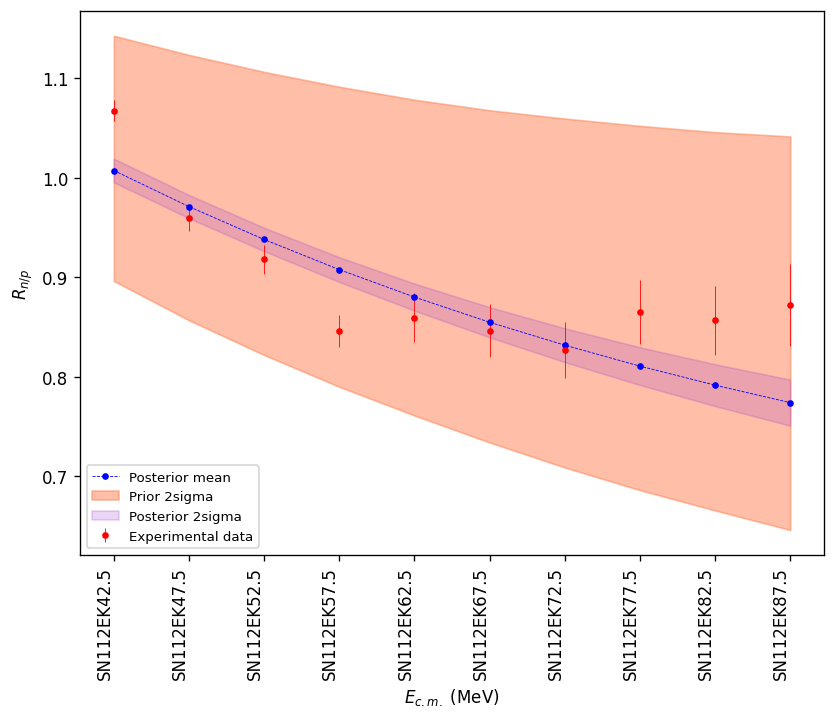

In [ ]:
#Left Segment: single ratio of SN112
Z1 = HH[0:10]
Z1s = HHs[0:10]
Z1 = Z1.reshape(10)
Z1s = Z1s.reshape(10)
Z1X = np.array(['SN112EK42.5', 'SN112EK47.5', 'SN112EK52.5', 'SN112EK57.5', 'SN112EK62.5', 'SN112EK67.5', 'SN112EK72.5', 'SN112EK77.5', 'SN112EK82.5', 'SN112EK87.5'])


SN112 = ['SN112EK42.5', 'SN112EK47.5', 'SN112EK52.5', 'SN112EK57.5', 'SN112EK62.5', 'SN112EK67.5', 'SN112EK72.5', 'SN112EK77.5', 'SN112EK82.5', 'SN112EK87.5']
error_112 = ['SN112EK42.5_Error', 'SN112EK47.5_Error', 'SN112EK52.5_Error', 'SN112EK57.5_Error', 'SN112EK62.5_Error', 'SN112EK67.5_Error', 'SN112EK72.5_Error', 'SN112EK77.5_Error', 'SN112EK82.5_Error', 'SN112EK87.5_Error']
y_112_std =df4.loc[:,error_112].values
Y_112 = df3.loc[:,SN112].values
y_112_std = y_112_std.reshape(10,1)
Y_112 = Y_112.reshape(10,1)


Y_112_mean = Y_mcmcdf[SN112].mean()
sigma_112 =  np.std(Y_mcmcdf[SN112])
sigma_112 = 2*sigma_112

figure(num=None,figsize=(8,6), dpi=120, facecolor='w', edgecolor='k')
exp_data = plt.errorbar(SN112,Y_112, yerr = y_112_std, fmt ='r.',linewidth=0.5, label ='Experimental data')
plt.fill_between(Z1X, Z1+Z1s,Z1-Z1s, alpha=0.5, color='coral', label='Prior 2sigma')
plt.plot(SN112, Y_112_mean, 'b.--',linewidth=0.5, label ='Posterior mean')
plt.fill_between(SN112, Y_112_mean + sigma_112, Y_112_mean-sigma_112, alpha=0.2, color='darkorchid', label='Posterior 2sigma')
plt.xlabel('$E_{c.m.}$ (MeV)')
plt.xticks(rotation=90, ha='right')
plt.ylabel('$R_{n/p}$')
plt.legend(loc='lower left',prop={'size': 8})

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.


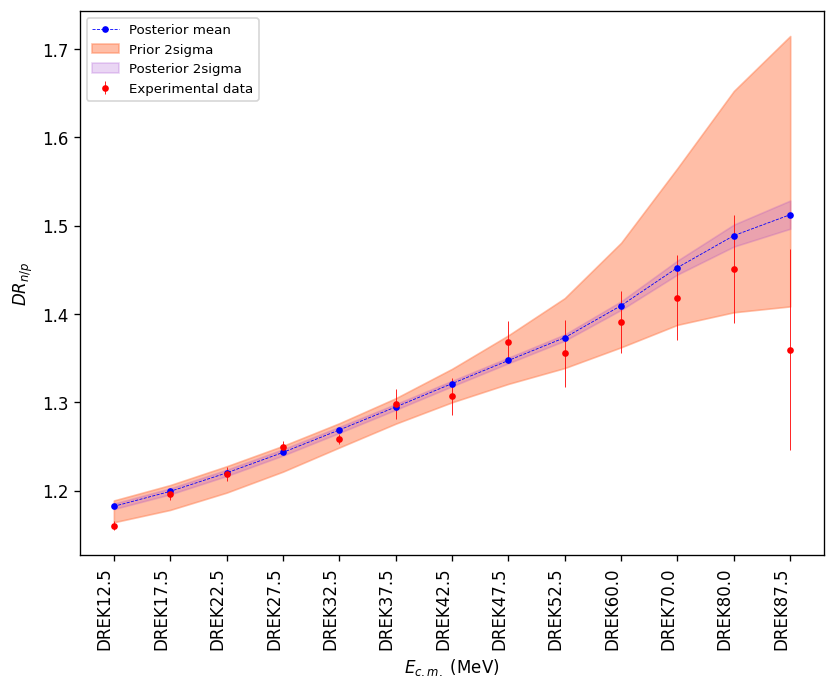

In [ ]:
#Right Segment: Double Ratio
Z3 = HH[20:33]
Z3s = HHs[20:33]
Z3 = Z3.reshape(13)
Z3s = Z3s.reshape(13)
Z3X = np.array(['DREK12.5', 'DREK17.5', 'DREK22.5', 'DREK27.5', 'DREK32.5', 'DREK37.5', 'DREK42.5', 'DREK47.5', 'DREK52.5', 'DREK60.0', 'DREK70.0', 'DREK80.0', 'DREK87.5'])


SNDR = ['DREK12.5', 'DREK17.5', 'DREK22.5', 'DREK27.5', 'DREK32.5', 'DREK37.5', 'DREK42.5', 'DREK47.5', 'DREK52.5', 'DREK60.0', 'DREK70.0', 'DREK80.0', 'DREK87.5']
error_DR = ['DREK12.5_Error', 'DREK17.5_Error', 'DREK22.5_Error', 'DREK27.5_Error', 'DREK32.5_Error', 'DREK37.5_Error', 'DREK42.5_Error', 'DREK47.5_Error', 'DREK52.5_Error', 'DREK60.0_Error', 'DREK70.0_Error', 'DREK80.0_Error', 'DREK87.5_Error']
y_DR_std =df4.loc[:,error_DR].values
Y_DR = df3.loc[:,SNDR].values
y_DR_std = y_DR_std.reshape(13,1)
Y_DR = Y_DR.reshape(13,1)


Y_DR_mean = Y_mcmcdf[SNDR].mean()
sigma_DR =  np.std(Y_mcmcdf[SNDR])
sigma_DR= 2*sigma_DR

figure(num=None,figsize=(8,6), dpi=120, facecolor='w', edgecolor='k')
exp_data = plt.errorbar(SNDR,Y_DR, yerr = y_DR_std, fmt ='r.',linewidth=0.5, label ='Experimental data')
plt.fill_between(Z3X, Z3+Z3s,Z3-Z3s, alpha=0.5, color='coral', label='Prior 2sigma')
plt.plot(SNDR, Y_DR_mean, 'b.--',linewidth=0.5, label ='Posterior mean')
plt.fill_between(SNDR, Y_DR_mean + sigma_DR, Y_DR_mean-sigma_DR, alpha=0.2, color='darkorchid', label='Posterior 2sigma')
plt.xlabel('$E_{c.m.}$ (MeV)')
plt.xticks(rotation=90, ha='right')
plt.ylabel('$DR_{n/p}$')
plt.legend(loc='upper left', prop={'size': 8})